## Imports

In [2]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    from sympy import symbols, Eq, solve
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


## File selection

In [16]:
#######################################################
#### GUI 

edt_filename_1 = widgets.Text(description = 'File1 (-0.85)', value=' Exp4-2_current')
edt_filename_2 = widgets.Text(description = 'File2 (-0.65)', value=' Exp4-1_current')
edt_filename_3 = widgets.Text(description = 'File3 (-1.05)', value=' Exp4-3_current')
btn_select = widgets.Button(description = 'Select files',button_style='success')
output_file = widgets.Output()

display(edt_filename_1, edt_filename_2, edt_filename_3, btn_select,output_file)



#######################################################
#### FUNCTIONS


#df_flux = pd.DataFrame({'Compartment':[],'Na_net':[], 'Na_leak':[],'Na_Atpase':[], 'K_net':[],'K_leak':[],'K_Atpase':[],'K_kcc2':[], 'Cl_net':[],'Cl_kcc2':[],'X':[],'z':[]  })
df_ed = pd.DataFrame({'Boundary':[],'Na':[],'K':[],'Cl':[]})



def btn_select_clicked(b):
    
    
    global filename_1 , filename_2, filename_3
    
    filename_1 = "\\"
    filename_1 = filename_1 + edt_filename_1.value 
    
    filename_2 = "\\"
    filename_2 = filename_2 + edt_filename_2.value 
    
    
    filename_3 = "\\"
    filename_3 = filename_3 + edt_filename_3.value 
    
    
    ##### FILE 1 data
    
    try: 
        with h5py.File(filename_1, mode='r') as hdf:
            
            print(filename_1+" file found... loading content") 
            global C, comp_names_arr, intervals, interval_arr, t_arr, f1_v_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            interval_arr = [round(interval_step * i) for i in range(intervals)]
            

            t_arr =[]
            f1_v_arr = []        
            ##### LOADING COMPARTMENT DATA
            
            for i in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[i])
                C_group_arr.append(C_group)
                v_arr = []
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    v_arr.append(dataset[-3])
                    if t_arr_bool == True:
                        t_arr.append(dataset[0])
                f1_v_arr.append(v_arr)    
                t_arr_bool = False
                
            print(filename_1+" content loaded into memory") 
            
    except: 
        raise(filename_1+" not found")
        raise("File needs to be in base directory")
        
     ##### FILE 2 data
    
    try: 
        with h5py.File(filename_2, mode='r') as hdf:
            
            print(filename_2+" file found... loading content") 
            global f2_v_arr
            C = hdf.get('COMPARTMENTS')
            comp_names_arr= list(C.keys())
            print(comp_names_arr)
            C_group_arr =[]
            f2_v_arr = []        
            ##### LOADING COMPARTMENT DATA
            
            for i in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[i])
                C_group_arr.append(C_group)
                v_arr = []
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    v_arr.append(dataset[-3])
                f2_v_arr.append(v_arr)    

            print(filename_2+" content loaded into memory") 
            
    except: 
        raise(filename_2+" not found")
        raise("File needs to be in base directory")
          
                
     ##### FILE 3 data
    
    try: 
        with h5py.File(filename_3, mode='r') as hdf:
            
            print(filename_3+" file found... loading content") 
            global f3_v_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            f3_v_arr = []        
            ##### LOADING COMPARTMENT DATA
            
            for i in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[i])
                C_group_arr.append(C_group)
                v_arr = []
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    v_arr.append(dataset[-3])
                f3_v_arr.append(v_arr)    

            print(filename_3+" content loaded into memory") 
            
    except: 
        raise(filename_3+" not found")
        raise("File needs to be in base directory")
          
        

btn_select.on_click(btn_select_clicked)
        

Text(value=' Exp4-2_current', description='File1 (-0.85)')

Text(value=' Exp4-1_current', description='File2 (-0.65)')

Text(value=' Exp4-3_current', description='File3 (-1.05)')

Button(button_style='success', description='Select files', style=ButtonStyle())

Output()

\ Exp4-2_current file found... loading content
\ Exp4-2_current content loaded into memory
\ Exp4-1_current file found... loading content
['Comp1', 'Comp2', 'Comp3', 'Comp4', 'Comp5', 'Comp6', 'Comp7', 'Comp8', 'Comp9']
\ Exp4-1_current content loaded into memory
\ Exp4-3_current file found... loading content
\ Exp4-3_current content loaded into memory


## Voltage traces


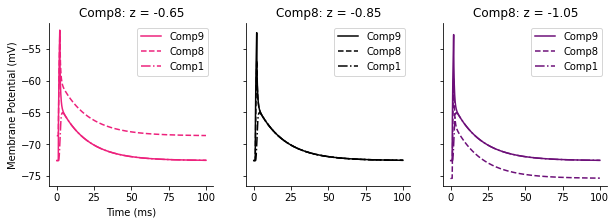

In [29]:
f4a, (ax_1,ax_2,ax_3) = mplt.subplots(1,3,figsize=(10,3), sharey=True, sharex=True) 
sns.despine()

t2_arr =[t_arr[i]*1e3 for i in range(len(t_arr))]


#### Z = -0.85
v_arr = [f1_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax_2.plot(t2_arr[::], v_arr[::],'-', label="Comp9",color='#000000')
ax_2.set_title("Comp8: z = -0.85")

v_arr = [f1_v_arr[7][j]*1e3 for j in range(len(t_arr))]
ax_2.plot(t2_arr[::], v_arr[::], '--',  label="Comp8",color='#000000')

v_arr = [f1_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax_2.plot(t2_arr[::], v_arr[::], '-.', label="Comp1",color='#000000')
ax_2.legend()

#### Z = -0.65

v_arr = [f2_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax_1.plot(t2_arr[::], v_arr[::], '-',  label="Comp9",color='#ed217c')
ax_1.set_title("Comp8: z = -0.65")

v_arr = [f2_v_arr[7][j]*1e3 for j in range(len(t_arr))]
ax_1.plot(t2_arr[::], v_arr[::], '--', label="Comp8",color='#ed217c')

v_arr = [f2_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax_1.plot(t2_arr[::], v_arr[::],'-.',  label="Comp1",color='#ed217c')
ax_1.legend()

ax_1.set_xlabel("Time (ms)")
ax_1.set_ylabel("Membrane Potential (mV)")
#### Z = -1.05

v_arr = [f3_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax_3.plot(t2_arr[::], v_arr[::],'-',  label="Comp9",color='#6c0f78')
ax_3.set_title("Comp8: z = -1.05")

v_arr = [f3_v_arr[7][j]*1e3 for j in range(len(t_arr))]
ax_3.plot(t2_arr[::], v_arr[::], '--', label="Comp8",color='#6c0f78')

v_arr = [f3_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax_3.plot(t2_arr[::], v_arr[::], '-.', label="Comp1",color='#6c0f78')

ax_3.legend()


## Time constants


2002
Vmax: -52.059984430329415mV
Time of Vmax: 2.0009999999999413s
---------
Vmin: -72.54484645928662mV
Time of Vmin: 99.99800000007934s
---------
4404
Vtau: -64.96544750857245mV
Time of Vtau: 0.00440300000000026s
---------
---------
Tau = 2.4020000000003185ms
---------
---------

2002
Vmax: -52.459239764961914mV
Time of Vmax: 2.0009999999999413s
---------
Vmin: -72.54196782127558mV
Time of Vmin: 99.99800000007934s
---------
4582
Vtau: -65.11135844043952mV
Time of Vtau: 0.004581000000000284s
---------
---------
Tau = 2.5800000000003425ms
---------
---------

2002
Vmax: -52.76201577693601mV
Time of Vmax: 2.0009999999999413s
---------
Vmin: -72.54868976264292mV
Time of Vmin: 99.99800000007934s
---------
4764
Vtau: -65.22762038793137mV
Time of Vtau: 0.004763000000000308s
---------
---------
Tau = 2.762000000000367ms
---------
---------


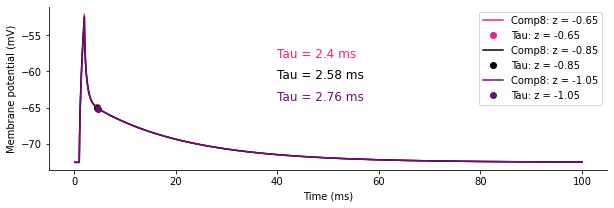

In [31]:
f4b, (ax_1) = mplt.subplots(1,1,figsize=(10,3), sharey=True) 

tau_arr = []

comp9_arr = []
v_arr = [f2_v_arr[8][j]*1e3 for j in range(len(t_arr))]
comp9_arr.append(v_arr)

v_arr = [f1_v_arr[8][j]*1e3 for j in range(len(t_arr))]
comp9_arr.append(v_arr)
#ax_1.plot(t2_arr[2000::], v_arr[2000::],'-', label="Comp9 - z=-0.85 ",color='#000000')
v_arr = [f3_v_arr[8][j]*1e3 for j in range(len(t_arr))]
comp9_arr.append(v_arr)
#ax_1.plot(t2_arr[2000::], v_arr[2000::],'-', label="Comp9 - z=-1.05 ",color='#6c0f78')



ax_1.set_ylabel("Membrane potential (mV)")
ax_1.set_xlabel("Time (ms)")


color_arr = ['#ed217c','#000000','#6c0f78']
main_label_arr = ["Comp8: z = -0.65","Comp8: z = -0.85","Comp8: z = -1.05"]
label_arr  = ["Tau: z = -0.65 ", "Tau: z = -0.85", "Tau: z = -1.05"]

for i in range(len(comp9_arr)):

    ax_1.plot(t2_arr[100::], comp9_arr[i][100::] ,'-', label=main_label_arr[i], color=color_arr[i])
    v_arr = comp9_arr[i]

    vmax = v_arr[0]
    vmin = v_arr[-1]
    vmax_index = 0
    vmin_index = -1


    for k in range(len(v_arr)):
        if vmax<v_arr[k]:
            vmax = v_arr[k]
            vmax_index = k

    print()
    print(vmax_index)
    print("Vmax: " + str(vmax) +"mV")
    print("Time of Vmax: " + str(t2_arr[vmax_index]) + "s")
    print("---------")
    print("Vmin: " + str(vmin) +"mV")
    print("Time of Vmin: " + str(t2_arr[vmin_index]) + "s")
    print("---------")

    vdiff = vmax-vmin
    vtau = vmax - 0.63*(vdiff)
    vtau_index = 0


    for j in range(len(v_arr)):
        if (j>1900) and (round(v_arr[j],1) == round(vtau,1)):
            vtau_index = j
            break

    print(vtau_index)

    print("Vtau: " + str(vtau) +"mV")
    print("Time of Vtau: " + str(t_arr[vtau_index]) + "s")

    tau = t2_arr[vtau_index] - t2_arr[vmax_index]
    tau_arr.append(tau)
    
    ax_1.plot(t2_arr[vtau_index], vtau,'o',color=color_arr[i], label=label_arr[i])
    

    print("---------")
    print("---------")
    print("Tau = " + str(tau) +"ms")
    print("---------")
    print("---------")

tau_string = "Tau = "+str(round(tau_arr[0],2)) + ' ms'
ax_1.text(40, -58 , tau_string, fontsize = 12, color=color_arr[0])
tau_string = "Tau = "+str(round(tau_arr[1],2)) + ' ms'
ax_1.text(40, -61 , tau_string, fontsize = 12, color=color_arr[1])
tau_string = "Tau = "+str(round(tau_arr[2],2)) + ' ms'
ax_1.text(40, -64 , tau_string, fontsize = 12, color=color_arr[2])
ax_1.legend( loc='upper right')
sns.despine()

## Length constants

[-52.059984430329415, -52.82233097237407, -60.31189377644391, -62.747356440034984, -64.29790167583883, -64.80937162990506, -64.95381865802875, -65.02151483656797, -65.0505614537059]
12.987210572440894
R² = 0.9943374295188352
Y = 17.754082922337037 * e^(-0.024743474867304348 * x) + 6.872854184815354
47.87784987413744
[-52.459239764961914, -56.840509834334235, -60.22381693224948, -62.6905886570885, -64.26940018729658, -64.79577000558236, -64.9413678948352, -65.00927219050719, -65.03836549947226]
12.575916049577863
R² = 0.993512157276126
Y = 17.14688126126652 * e^(-0.02382677990349644 * x) + 6.831097183809603
49.049411342987625
[-52.76201577693601, -59.737002577275064, -60.16741332190645, -62.65749948683359, -64.25720830726819, -64.79480386788552, -64.94127008865459, -65.00933522605109, -65.0384663759193]
12.27332940855031
R² = 0.9927596789583628
Y = 16.711222381201058 * e^(-0.023138472785026582 * x) + 6.795931298670554
49.96985326016314


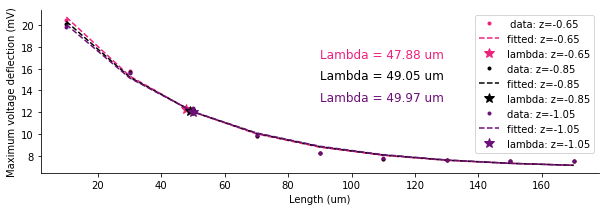

In [32]:
f4c, (ax_1) = mplt.subplots(1,1,figsize=(10,3), sharey=True) 

ax_1.set_ylabel("Maximum voltage deflection (mV)")
ax_1.set_xlabel("Length (um)")
colour_arr = ['#ed217c','#000000','#6c0f78']

########################################################################################
#########################################################################################

# FILE 2

########################################################################################
########################################################################################
v_max_arr = []
v_min_arr = []
v_delta_arr = []
   
for i in range(len(comp_names_arr)):
    
    max = f2_v_arr[i][0]*1e3
    min = f2_v_arr[i][-1] *1e3
               
    for j in range(len(t_arr)):
        if f2_v_arr[i][j]*1e3 > max:
            max = f2_v_arr[i][j]*1e3
    
    v_max_arr.append(max)
    v_min_arr.append(min)
    v_delta_arr.append(max-min)

v_delta_arr.reverse()

#v_max_arr = [-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
len_arr = [10,30,50,70,90,110,130,150,170]
v_max_arr.reverse()

global x_lambda
print(v_max_arr)
v_max = v_max_arr[0]
v_diff = v_delta_arr[0]-v_delta_arr[8]
print(v_diff)
v_lambda = v_delta_arr[0]-0.63*v_diff


x_data = np.array(len_arr)
y_data = np.array(v_delta_arr)

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, len_arr, v_delta_arr, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate


# determine quality of the fit
squaredDiffs = np.square(y_data - monoExp(x_data, m, t, b))
squaredDiffsFromMean = np.square(y_data - np.mean(y_data))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results

y_curve_arr = [monoExp(len_arr[i], m, t, b) for i in range(len(len_arr))]

ax_1.plot(len_arr, v_delta_arr, '.', label=" data: z=-0.65", color=colour_arr[0])
ax_1.plot(len_arr, y_curve_arr, '--', label="fitted: z=-0.65", color=colour_arr[0])

#ax_1.title("Fitted Exponential Curve")


# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
#print(f"Tau = {tauSec * 1e6} µs")


############## FIND LAMBDA

y_lambda = v_lambda
x_lambda = np.log((y_lambda-b)/m)/-t
print(x_lambda)

ax_1.plot(x_lambda,y_lambda,'*',color=colour_arr[0],label='lambda: z=-0.65',markersize=10)
ax_1.legend()
lambda_string = "Lambda = "+str(round(x_lambda,2))+' um'
ax_1.text(90, 17 , lambda_string, fontsize = 12, color=colour_arr[0])
########################################################################################
#########################################################################################

# FILE 1

########################################################################################
########################################################################################

v_max_arr = []
v_min_arr = []
v_delta_arr = []
   
for i in range(len(comp_names_arr)):
    
    max = f1_v_arr[i][0]*1e3
    min = f1_v_arr[i][-1] *1e3
               
    for j in range(len(t_arr)):
        if f1_v_arr[i][j]*1e3 > max:
            max = f1_v_arr[i][j]*1e3
    
    v_max_arr.append(max)
    v_min_arr.append(min)
    v_delta_arr.append(max-min)

v_delta_arr.reverse()

#v_max_arr = [-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
len_arr = [10,30,50,70,90,110,130,150,170]
v_max_arr.reverse()

global x_lambda
print(v_max_arr)
v_max = v_max_arr[0]
v_diff = v_delta_arr[0]-v_delta_arr[8]
print(v_diff)
v_lambda = v_delta_arr[0]-0.63*v_diff


x_data = np.array(len_arr)
y_data = np.array(v_delta_arr)

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, len_arr, v_delta_arr, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate


# determine quality of the fit
squaredDiffs = np.square(y_data - monoExp(x_data, m, t, b))
squaredDiffsFromMean = np.square(y_data - np.mean(y_data))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results

y_curve_arr = [monoExp(len_arr[i], m, t, b) for i in range(len(len_arr))]

ax_1.plot(len_arr, v_delta_arr, '.', label="data: z=-0.85", color=colour_arr[1])
ax_1.plot(len_arr, y_curve_arr, '--', label="fitted: z=-0.85", color=colour_arr[1])

#ax_1.title("Fitted Exponential Curve")


# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
#print(f"Tau = {tauSec * 1e6} µs")


############## FIND LAMBDA

y_lambda = v_lambda
x_lambda = np.log((y_lambda-b)/m)/-t
print(x_lambda)

ax_1.plot(x_lambda,y_lambda,'*',color=color_arr[1],label='lambda: z=-0.85',markersize=10)
ax_1.legend()
lambda_string = "Lambda = "+str(round(x_lambda,2))+' um'
ax_1.text(90, 15 , lambda_string, fontsize = 12, color=color_arr[1])


########################################################################################
#########################################################################################

# FILE 3

########################################################################################
########################################################################################

v_max_arr = []
v_min_arr = []
v_delta_arr = []
   
for i in range(len(comp_names_arr)):
    
    max = f3_v_arr[i][0]*1e3
    min = f3_v_arr[i][-1] *1e3
               
    for j in range(len(t_arr)):
        if f3_v_arr[i][j]*1e3 > max:
            max = f3_v_arr[i][j]*1e3
    
    v_max_arr.append(max)
    v_min_arr.append(min)
    v_delta_arr.append(max-min)

v_delta_arr.reverse()

#v_max_arr = [-52.7109, -57.0181, -60.3333, -62.734, -64.2549, -64.7376, -64.8692, -64.9307, -64.9571]
len_arr = [10,30,50,70,90,110,130,150,170]
v_max_arr.reverse()

global x_lambda
print(v_max_arr)
v_max = v_max_arr[0]
v_diff = v_delta_arr[0]-v_delta_arr[8]
print(v_diff)
v_lambda = v_delta_arr[0]-0.63*v_diff


x_data = np.array(len_arr)
y_data = np.array(v_delta_arr)

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, len_arr, v_delta_arr, p0)
m, t, b = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate


# determine quality of the fit
squaredDiffs = np.square(y_data - monoExp(x_data, m, t, b))
squaredDiffsFromMean = np.square(y_data - np.mean(y_data))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results

y_curve_arr = [monoExp(len_arr[i], m, t, b) for i in range(len(len_arr))]

ax_1.plot(len_arr, v_delta_arr, '.', label="data: z=-1.05", color=colour_arr[2])
ax_1.plot(len_arr, y_curve_arr, '--', label="fitted: z=-1.05", color=colour_arr[2])

#ax_1.title("Fitted Exponential Curve")


# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
#print(f"Tau = {tauSec * 1e6} µs")


############## FIND LAMBDA

y_lambda = v_lambda
x_lambda = np.log((y_lambda-b)/m)/-t
print(x_lambda)

ax_1.plot(x_lambda,y_lambda,'*',color=color_arr[2],label='lambda: z=-1.05',markersize=10)
ax_1.legend()
lambda_string = "Lambda = "+str(round(x_lambda,2))+' um'
ax_1.text(90, 13 , lambda_string, fontsize = 12, color=color_arr[2])
sns.despine()